In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



train_data=pd.read_csv(r'C:\Users\heena\OneDrive\Desktop\titanic\train.csv')
test_data=pd.read_csv(r'C:\Users\heena\OneDrive\Desktop\titanic\test.csv')

In [4]:
# EDA
print(train_data.head())
print(train_data.isnull().sum())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

C:\Users\heena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='Survived', ylabel='count'>

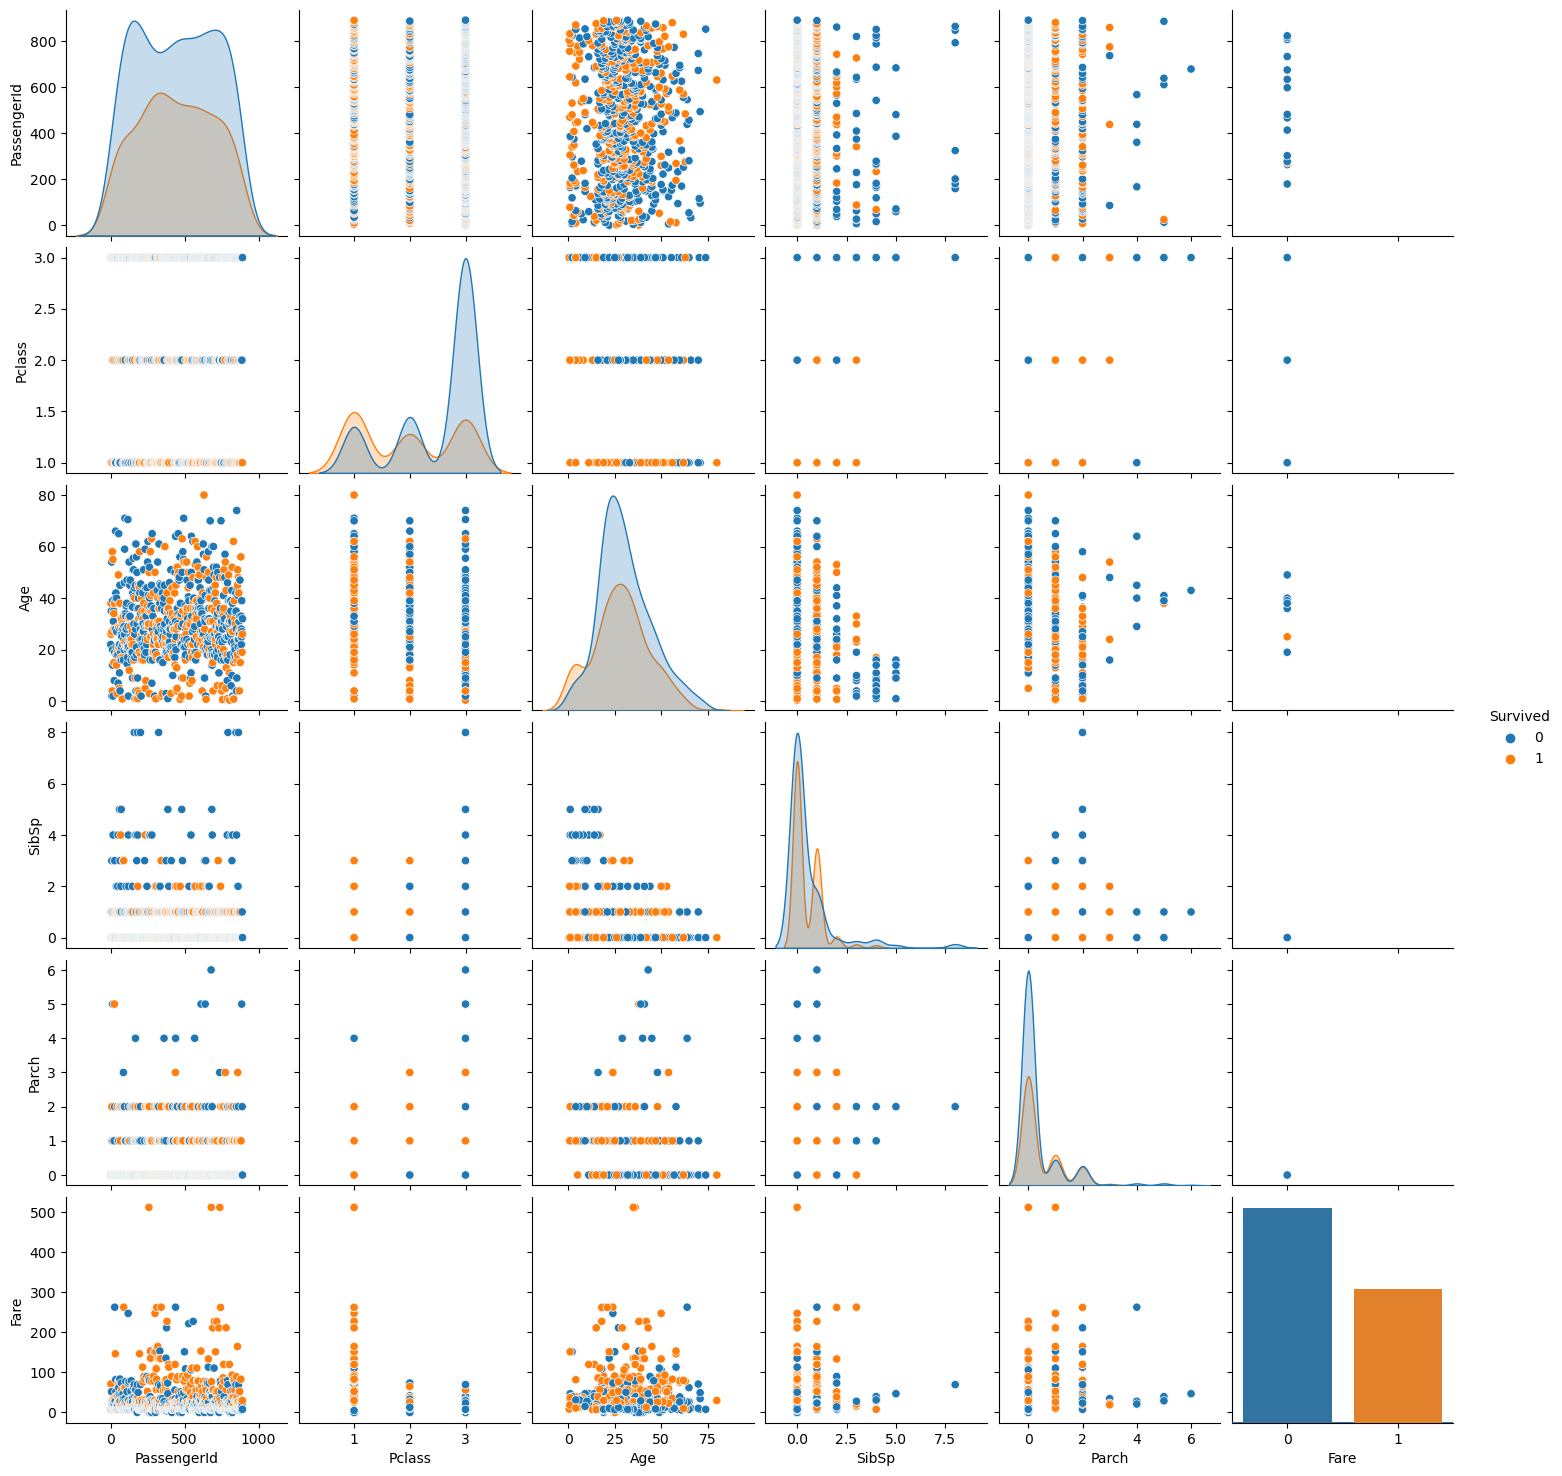

In [20]:
# Visualize the data using seaborn
sns.pairplot(data, hue='Survived')
sns.countplot(x='Survived', data=data)

In [13]:

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.776536312849162


In [15]:
# Support Vector Machine (SVM)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC())])

svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)=

SVM Accuracy: 0.7821229050279329


In [16]:
# decision tree
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7206703910614525


In [17]:
# Hyperparameter Tuning for SVM
param_grid = {'classifier__C': [0.1, 1, 10, 100],
              'classifier__gamma': [0.01, 0.1, 1, 10]}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm = svm_grid_search.best_estimator_

best_svm_predictions = best_svm.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, best_svm_predictions)
print("Best SVM Accuracy:", best_svm_accuracy)

Best SVM Accuracy: 0.7877094972067039
